# HOUSING DATA REGRESSION MODEL.

* ####  Author: Brian Kipruto Ngeny. 
* ####  Student pace: Full time
* ####  Scheduled project review date/time: 09/07/2023 23:59:59
* ####  Instructor name: Veronica Isiaho
* ####  Blog post URL: 


***

## 1. Business Understanding.
> ### Introduction.
Housing projects consist of several different factors that determine the quality of the final product which is a house. Housing project can be managed by a real estate agency which is a business that arranges the selling, renting, or management of homes, land, and buildings for their owners. A real estate agency is a key player in the housing market, attracting both local and international investors who seek to capitalize on the lucrative opportunities presented by real property. With the advent of technology and availability of vast amounts of data, investors are increasingly turning to quantitative ananlysis and machine learning techniques to determine the factors that affect the sale price of houses in the real estate industry.

> This project aims to determine the specific factors that increase or decrease the sale price of a housing unit by using a range of specific factors within the data provided. The target partners include; real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy. By determining the factors that affect the sale price of a house, I hope to provide them with valuable insights that can inform their investment decisions and enable them to optimize their investment returns. 

> ### Problem statement
Historical housing data exists in enormous quantities, but it is mostly comprised of reports compiled after the house has been sold. This makes it hard to deduce the specific factors that affected the sale price of the houses. Determining which factors have the most significant effect on the final selling price of a house is crucial in making informed decissions about whether to invest in specific aspects such as renovations, expansions or even the housing unit as a whole.

> To address this issue, I aim to use statistical ananlysis to identify the specific factors that affect the sale price of a house. By doing so, I hope to provide an accurate linear regression model that helps real estate agencies, construction companies, home owners who are interested in selling and potential home owners looking to buy make informed decissions. This research will lead to a better understanding of the housing industry and increase returns on investments.

> ### Objectives
My aim is to:
> * Perform a statistical analysis of the data provided to determine the specific factors that affect the final selling price of a house.
> * Formulate an accurate linear regression model that helps stakeholders make informed decissions before investing in houses.
> * Provide recommendations based on the regression model.


## Data Understanding

#### I) Importing libraries and loading data.

In [57]:
import pandas as pd
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew
pd.options.mode.chained_assignment = None

data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [58]:
# information about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### II) Data description.
The King County dataset contains 21597 rows and 21 columns with the following information:

|No.| Column    | Description|
|---| ---       | ---         |
|1|id|Unique identifier for a house|
|2|date|Date the house was sold|
|3|price|sale price of the house|
|4|bedrooms|number of bedrooms|
|5|bathrooms|number of bathrooms|
|6|sqft_living|square feet of the living area|
|7|sqft_lot|square feet of the lot|
|8|floors|number of floors|
|9|waterfront|whether the house is on a waterfront|
|10|view|view from the house|
|11|condition|general condition of the house|
|12|grade|overall grade of the house|
|13|sqft_above|square feet of the house above the basement|
|14|sqft_basement|square feet of the basement|
|15|yr_buit|the year it was built|
|16|yr_renovated|the year it was renovated|
|17|zipcode|area zipcode|
|18|lat|latitude coordinates|
|19|long|longitude coordinates|
|20|sqft_living15|square feet of the living area for 15 neighbouring houses|
|21|sqft_lot15|square feet of the land lots for 15 neighbouring houses|

The next step is to check the value count on some columns to determine if they can be useful. 

In [59]:
# check the value count for waterfront column
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

This column provides two useful categories that will be helpful in determining the effect of a waterfront on the price of a house. 

In [60]:
# check the value count for view column
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

The 'view' column will be useful as it provides categories that help in determining the avarage price of houses with different views.  

In [61]:
# check the value counts for condition column
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

This column consists of 5 unique categories which will be helpful in determining the effect of the house condition on its price.

In [62]:
# check the value counts for grade column
data['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

This column has 10 distinct categories which will be helpful in determining the effect of the grade on the final price of a house.

In [63]:
# check the value count for the yr_built column
data['yr_built'].value_counts()

yr_built
2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: count, Length: 116, dtype: int64

These column has records of houses spaning a period of 116 years, these are obviously way too many data points. In order to be able to use these column effectively, I will engineer a new feature in the dataset called age_group, which will contain the the ages of houses grouped into twenty-five year periods.  

In [64]:
# check the value counts for the yr_renovated column
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

This column contains 70 different values with a majority of the houses having the value 0.0 which means that they have never been renovated or that the renovation year is unknown. This column will be dropped.

In [66]:
# check the value counts for zipcode column
data['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

The zipcode column consists of 70 different zipcodes and thus, may not provide any insight into the effect on the price of the houses.

Out of the 21 columns in the dataset, only 10 columns are useful to the process. The columns that will be dropped are date, sqft_above, sqft_basement, sqft_living, sqft_lot, yr_renovated, zipcode, lat, long, sqft_living 15 and sqft_lot15. These columns will be dropped because most of them e.g sqft_above, sqft_basement, sqft_living and sqft_lot have an almost obvious effect on the price of a house i.e the bigger the square footage the more expensive the house and vice versa. The date, zipcode, lat and long have litle to no bearing at all on the sale price of the houses.  

### Data cleaning
The next step is to clean the data by going through the following steps so as to end up with a complete data set that can then be used in the modelling process of the regression model. The data cleaning steps are;
* Dropping the columns we don't need.
* Identifying any missing values and dropping the rows with missing values. This is the best solution for dealing with missing values because the rows with missing values are few and are not likely to affect the outcome of the model. 
* Engineering new features or columns where necessary.

In [67]:
# dropping the columns we do not need
data = data.drop(['date', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
data

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1.0,NaN,NONE,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2.0,NO,NONE,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,1.0,NO,NONE,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1.0,NO,NONE,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1.0,NO,NONE,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,3.0,NO,NONE,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2.0,NO,NONE,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,2.0,NO,NONE,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,2.0,NaN,NONE,Average,8 Good,2004


In [68]:
# Identifying missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          21597 non-null  int64  
 1   price       21597 non-null  float64
 2   bedrooms    21597 non-null  int64  
 3   bathrooms   21597 non-null  float64
 4   floors      21597 non-null  float64
 5   waterfront  19221 non-null  object 
 6   view        21534 non-null  object 
 7   condition   21597 non-null  object 
 8   grade       21597 non-null  object 
 9   yr_built    21597 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.6+ MB


There are missing values in the waterfront and view columns. we can drop these rows with missing values to remain with a complete dataset. 

In [69]:
# dropping rows with missing values
data = data.dropna(axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19164 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          19164 non-null  int64  
 1   price       19164 non-null  float64
 2   bedrooms    19164 non-null  int64  
 3   bathrooms   19164 non-null  float64
 4   floors      19164 non-null  float64
 5   waterfront  19164 non-null  object 
 6   view        19164 non-null  object 
 7   condition   19164 non-null  object 
 8   grade       19164 non-null  object 
 9   yr_built    19164 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 1.6+ MB


In [70]:
#create a new column age
data['age'] = abs(data.loc[:, 'yr_built'] - 2015)
data

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,age
1,6414100192,538000.0,3,2.25,2.0,NO,NONE,Average,7 Average,1951,64
2,5631500400,180000.0,2,1.00,1.0,NO,NONE,Average,6 Low Average,1933,82
3,2487200875,604000.0,4,3.00,1.0,NO,NONE,Very Good,7 Average,1965,50
4,1954400510,510000.0,3,2.00,1.0,NO,NONE,Average,8 Good,1987,28
5,7237550310,1230000.0,4,4.50,1.0,NO,NONE,Average,11 Excellent,2001,14
...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,2.0,NO,NONE,Average,8 Good,2008,7
21592,263000018,360000.0,3,2.50,3.0,NO,NONE,Average,8 Good,2009,6
21593,6600060120,400000.0,4,2.50,2.0,NO,NONE,Average,8 Good,2014,1
21594,1523300141,402101.0,2,0.75,2.0,NO,NONE,Average,7 Average,2009,6


## Data Preparation

> ### Hypothesis testing

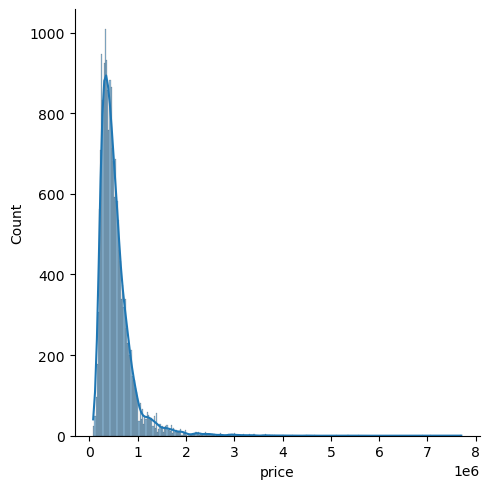

In [73]:
sns.displot(data['price'], kde=True)

In [74]:
print('Skewness:', skew(data['price']))
print('Kurtosis:', kurtosis(data['price']))

Skewness: 4.080775439740663
Kurtosis: 35.29168264676446


In [76]:
# create a simple regression model
simple_formula = 'price ~ bedrooms'
simple_model = ols(simple_formula, data).fit()
simple_model_summary = simple_model.summary()
# YOUR CODE HERE
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2024.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:31:19   Log-Likelihood:            -2.7198e+05
No. Observations:               19164   AIC:                         5.440e+05
Df Residuals:                   19162   BIC:                         5.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.249e+05   9603.499     13.009      0.000    1.06e+05    1.44e+05
bedrooms    1.234e+05   2743.933     44.984      0.000    1.18e+05    1.29e+05
==============================================================================
Omnibus:                    16894.927   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1114068.260
Skew:                           3.956   Prob(JB):                         0.00
Kurtosis:                      39.505   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""